In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_df=pd.read_csv("framingham.csv")

In [3]:
heart_df.shape

(4238, 16)

In [4]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
heart_df.describe() ## stats

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
heart_df.nunique()/heart_df.shape[0] ## unique values

male               0.000472
age                0.009202
education          0.000944
currentSmoker      0.000472
cigsPerDay         0.007787
BPMeds             0.000472
prevalentStroke    0.000472
prevalentHyp       0.000472
diabetes           0.000472
totChol            0.058518
sysBP              0.055215
diaBP              0.034450
BMI                0.321614
heartRate          0.017225
glucose            0.033742
TenYearCHD         0.000472
dtype: float64

In [8]:
heart_df.isnull().sum() ## null values

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

DATA CLEANING

In [9]:
## Replacing null values with the mean value
heart_df["education"].fillna(heart_df["education"].mean(),inplace=True)
heart_df["cigsPerDay"].fillna(heart_df["cigsPerDay"].mean(),inplace=True)
heart_df["BPMeds"].fillna(heart_df["BPMeds"].mean(),inplace=True)
heart_df["totChol"].fillna(heart_df["totChol"].mean(),inplace=True)
heart_df["BMI"].fillna(heart_df["BMI"].mean(),inplace=True)
heart_df["heartRate"].fillna(heart_df["heartRate"].mean(),inplace=True)
heart_df["glucose"].fillna(heart_df["glucose"].mean(),inplace=True)

In [10]:
## Rechecking for null values
heart_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [11]:
## CHD value counts
heart_df.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

SPLITTING DATA - TRAINING AND TESTING SETS

In [12]:
## importing packages

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.metrics import roc_curve , auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [13]:
## Defining variables X,y 
X= heart_df.drop("TenYearCHD",axis=1)
y=heart_df["TenYearCHD"]
print("Columns in X :",X.columns)
print("y :",y)
print("shape of X:",X.shape)
print("shape of y:",y.shape[0])

Columns in X : Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
y : 0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64
shape of X: (4238, 15)
shape of y: 4238


In [14]:
## Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
X_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3748,0,60,1.0,0,0.0,0.0,0,0,0,275.0,134.0,74.0,19.91,66.0,85.0
1928,0,42,3.0,1,20.0,0.0,0,0,0,193.0,129.0,91.5,27.78,95.0,74.0
2058,1,60,2.0,1,20.0,0.0,0,0,0,305.0,112.5,75.0,22.70,75.0,98.0
2106,1,67,3.0,0,0.0,0.0,0,0,0,250.0,120.0,83.0,22.36,65.0,78.0
3103,0,51,1.0,0,0.0,0.0,0,0,0,236.0,115.0,71.0,23.48,80.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0,44,2.0,0,0.0,0.0,0,1,0,187.0,122.0,83.0,30.40,85.0,75.0
3264,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0
1653,1,39,3.0,1,20.0,0.0,0,0,0,148.0,101.0,62.0,24.47,70.0,81.0
2607,0,57,1.0,0,0.0,0.0,0,1,0,382.0,133.0,77.0,24.27,75.0,81.0


In [16]:
X_train.shape[1]

15

In [17]:
#to specify bounds in differential privacy
list_min1=[]
list_max1=[]

for i in range (0,X_train.shape[1]):
    list_min1.append(min(X_train.iloc[:,i].values))
    list_max1.append(max(X_train.iloc[:,i].values))

In [18]:
list_min1=list(map(int,list_min1))

In [19]:
list_max1=list(map(int,list_max1))

In [20]:
list_min1

[0, 32, 1, 0, 0, 0, 0, 0, 0, 107, 83, 48, 15, 44, 40]

In [21]:
list_max1

[1, 70, 4, 1, 70, 1, 1, 1, 1, 600, 248, 142, 51, 143, 394]

MODEL TRAINING

In [22]:
## Scaling the data 
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [23]:
## Training the model using Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [24]:
## Predicting data
y_pred=model.predict(X_test)

In [25]:
## classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       890
           1       0.65      0.06      0.12       170

    accuracy                           0.84      1060
   macro avg       0.75      0.53      0.52      1060
weighted avg       0.82      0.84      0.79      1060



Confusion matrix is 
 [[884   6]
 [159  11]]


Text(42.0, 0.5, 'predicted label')

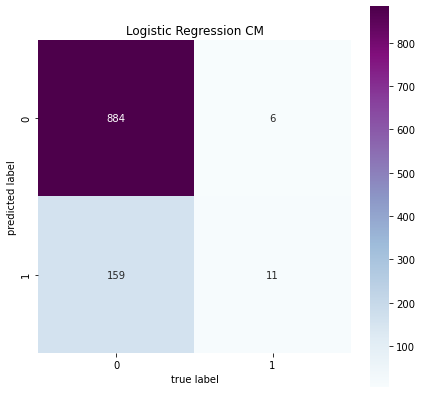

In [26]:
## confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
print("Confusion matrix is \n",conf_mat)

## plotting confusion matrix
plt.figure(figsize=(7,7))
plt.title("Logistic Regression CM")
sns.heatmap(conf_mat, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [27]:
## accuracy score
print("accuracy score : ",accuracy_score(y_test,y_pred))

## percentage accurate
print("accuracy : ", round(100*accuracy_score(y_test,y_pred)),"%")

accuracy score :  0.8443396226415094
accuracy :  84 %


In [28]:
import sklearn as sk
from sklearn.pipeline import Pipeline
from diffprivlib import models

In [29]:
pipe = Pipeline([
    ('scaler', sk.preprocessing.StandardScaler()),
    ('pca', sk.decomposition.PCA(2)),
    ('lr', sk.linear_model.LogisticRegression(solver="lbfgs"))
])

In [30]:
#non-private test using pipeline 
pipe.fit(X_train, y_train)
baseline = pipe.score(X_test, y_test)
print("Non-private test accuracy : %.2f%%" % (baseline * 100))

Non-private test accuracy : 84.06%


In [31]:
X_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-0.869368,1.217935,-0.969358,-1.006947,-0.763026,-0.170142,-0.085382,-0.666250,-0.159662,0.859531,0.086308,-0.734563,-1.446786,-0.815688,0.128600
1,-0.869368,-0.883050,1.000122,0.993101,0.909081,-0.170142,-0.085382,-0.666250,-0.159662,-1.012015,-0.142971,0.736970,0.488388,1.592170,-0.353837
2,1.150261,1.217935,0.015382,0.993101,0.909081,-0.170142,-0.085382,-0.666250,-0.159662,1.544243,-0.899589,-0.650475,-0.760746,-0.068422,0.698753
3,1.150261,2.034985,1.000122,-1.006947,-0.763026,-0.170142,-0.085382,-0.666250,-0.159662,0.288938,-0.555671,0.022226,-0.844349,-0.898717,-0.178406
4,-0.869368,0.167443,-0.969358,-1.006947,-0.763026,-0.170142,-0.085382,-0.666250,-0.159662,-0.030595,-0.784949,-0.986825,-0.568950,0.346726,0.084742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,-0.869368,-0.649607,0.015382,-1.006947,-0.763026,-0.170142,-0.085382,1.500938,-0.159662,-1.148958,-0.463960,0.022226,1.132626,0.761874,-0.309979
3174,-0.869368,0.167443,-0.969358,0.993101,-0.595815,-0.170142,-0.085382,-0.666250,-0.159662,0.539999,-0.234682,-0.145949,-1.365642,-0.068422,0.611037
3175,1.150261,-1.233214,1.000122,0.993101,0.909081,-0.170142,-0.085382,-0.666250,-0.159662,-2.039084,-1.426928,-1.743614,-0.325516,-0.483570,-0.046832
3176,-0.869368,0.867771,-0.969358,-1.006947,-0.763026,-0.170142,-0.085382,1.500938,-0.159662,3.301671,0.040452,-0.482300,-0.374695,-0.068422,-0.046832


In [32]:
X=X_train.to_numpy()

In [33]:
X

array([[-0.86936822,  1.21793504, -0.96935783, ..., -1.44678609,
        -0.81568787,  0.12859984],
       [-0.86936822, -0.88304973,  1.00012206, ...,  0.48838803,
         1.59216957, -0.35383715],
       [ 1.15026059,  1.21793504,  0.01538212, ..., -0.76074597,
        -0.06842177,  0.69875264],
       ...,
       [ 1.15026059, -1.23321386,  1.00012206, ..., -0.32551621,
        -0.48356961, -0.04683179],
       [-0.86936822,  0.86777091, -0.96935783, ..., -0.37469471,
        -0.06842177, -0.04683179],
       [-0.86936822, -1.11649249,  0.01538212, ...,  0.18839915,
        -0.06842177, -0.39769505]])

In [34]:
from numpy import inf
from numpy.linalg import norm
maxnorm = norm(X,inf,axis=1)
print(maxnorm.size)
maxnorm=[int(i) for i in maxnorm]
print(max(maxnorm))
#print(min(maxnorm))

3178
13


In [35]:
X= heart_df.drop("TenYearCHD",axis=1)
y=heart_df["TenYearCHD"]

In [36]:
## Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
ytrain=y_train

In [37]:
#private test using pipeline
dp_pipe = Pipeline([
    ('scaler', models.StandardScaler(epsilon=1,bounds=(list_min1,list_max1))),
    ('pca', models.PCA(epsilon=1,data_norm=13, centered=True)),
    ('lr', models.LogisticRegression(epsilon=1,data_norm=13))
])

In [38]:
#y_train.equals(ytrain)
print(ytrain)
print(y_train)

3748    0
1928    0
2058    1
2106    1
3103    0
       ..
1033    0
3264    0
1653    0
2607    0
2732    0
Name: TenYearCHD, Length: 3178, dtype: int64
3748    0
1928    0
2058    1
2106    1
3103    0
       ..
1033    0
3264    0
1653    0
2607    0
2732    0
Name: TenYearCHD, Length: 3178, dtype: int64


In [39]:
dp_pipe.fit(X_train, y_train)
print("Differentially private pipeline test accuracy (epsilon=1): %.2f%%" % (dp_pipe.score(X_test, y_test) * 100))

Differentially private pipeline test accuracy (epsilon=1): 67.55%


In [40]:
"""epsilons = np.logspace(-2, 1.45, 10)
pipe_accuracy = []

for epsilon in epsilons:
    _eps = epsilon / 3
    dp_pipe.set_params(scaler__epsilon=_eps, pca__epsilon=_eps, lr__epsilon=_eps)
    
    dp_pipe.fit(X_train, y_train)
    pipe_accuracy.append(dp_pipe.score(X_test, y_test))"""

'epsilons = np.logspace(-2, 1.45, 10)\npipe_accuracy = []\n\nfor epsilon in epsilons:\n    _eps = epsilon / 3\n    dp_pipe.set_params(scaler__epsilon=_eps, pca__epsilon=_eps, lr__epsilon=_eps)\n    \n    dp_pipe.fit(X_train, y_train)\n    pipe_accuracy.append(dp_pipe.score(X_test, y_test))'

In [41]:
"""import pickle

pickle.dump((epsilons, baseline, pipe_accuracy), open("logisticReg_accuracy_trend.p", "wb" ) )"""

'import pickle\n\npickle.dump((epsilons, baseline, pipe_accuracy), open("logisticReg_accuracy_trend.p", "wb" ) )'

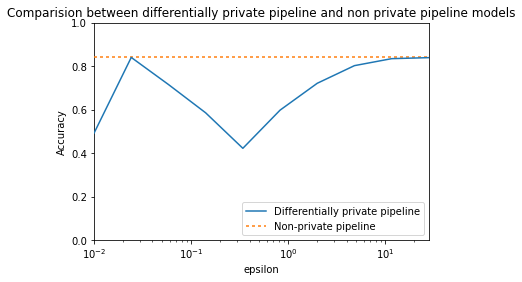

In [42]:
import matplotlib.pyplot as plt
import pickle

epsilons, baseline, pipe_accuracy = pickle.load(open("logisticReg_accuracy_trend.p", "rb"))

plt.semilogx(epsilons, pipe_accuracy, label="Differentially private pipeline", zorder=10)
plt.plot(epsilons, np.ones_like(epsilons) * baseline, dashes=[2,2], label="Non-private pipeline", zorder=5)
plt.title("Comparision between differentially private pipeline and non private pipeline models")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend(loc=4)
plt.show()

Testing with new inputs

In [43]:
#giving random outputs for each run

In [44]:
new=[[1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0]]
out=dp_pipe.predict(new)
print(new,out)

[[1, 39, 4.0, 0, 0.0, 0.0, 0, 0, 0, 195.0, 106.0, 70.0, 26.97, 80.0, 77.0]] [0]


In [45]:
new=[[0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0]]
out=dp_pipe.predict(new)
print(new,out)

[[0, 61, 3.0, 1, 30.0, 0.0, 0, 1, 0, 225.0, 150.0, 95.0, 28.58, 65.0, 103.0]] [1]


In [46]:
new=[[0, 59, 1.0, 0, 0.0, 0.0, 0, 1, 0, 209.0, 150.0, 85.0, 20.77, 90.0, 88.0]]
out=dp_pipe.predict(new)
print(new,out)

[[0, 59, 1.0, 0, 0.0, 0.0, 0, 1, 0, 209.0, 150.0, 85.0, 20.77, 90.0, 88.0]] [0]


CONCLUSION


Here privacy is calculated in terms of True positives and true negatives(accuracy of the model).The right predictions are dominant compared to wrong ones. so there is sufficient accuracy without compromising on privacy.